# PRUEBA FINAL - ESTADISTICAS CON PYTHON - DATA SCIENCE - DESAFIO LATAM

Descripción
La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido
a enfermedades cardíacas, producidas en su gran mayoría por enfermedades
cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede
ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto
riesgo y reducir las complicaciones.
La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre
los cuales se encuentran
- Sex: M - F
- Age: edad
- Education: codificada, considerando que un valor más alto corresponde a un mayor
nivel educativo.
- currentSmoker: si el paciente es o no fumador actual
● cigsPerDay: el número de cigarrillos que la persona fumaba en promedio en un día.
- BPMeds: si el paciente estaba tomando medicamentos para la presión arterial (0: No,
1: Sí)
- prevalenStroke: si el paciente había tenido un accidente cerebrovascular previamente
(0: No, 1: Sí)
- prevalentHyp:: si el paciente era hipertenso o no (0: No, 1: Sí)
- diabetes: si el paciente tenía diabetes o no (0: No, 1: Sí)
- totChol: nivel de colesterol total
- sysBP: presión arterial sistólica
- diaBP_BMI: presión arterial diastólica
- BMI: Índice de masa corporal
- heartRate: : ritmo cardíaco
- glucose: nivel de glucosa

- TenYearCHD: se indica si el paciente sufrió o no una enfermedad coronaria en los
últimos 10 años.(0: No, 1: Sí)
A partir de estos datos, buscaremos realizar algunas descripciones predictivos.


In [190]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos

In [191]:
# Importamos archivo
path_data = 'data/cardio.csv'
df = pd.read_csv(path_data)
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [192]:
# Obtenemos estructura, tipos de datos y datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [193]:
# Obtenemos un resumen estadistico de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5


In [194]:
# Revisamos datos nulos
df.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [195]:
# Eliminamos datos faltantes
df.dropna(inplace=True)

# Validamos la eliminacion de nulos
df.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

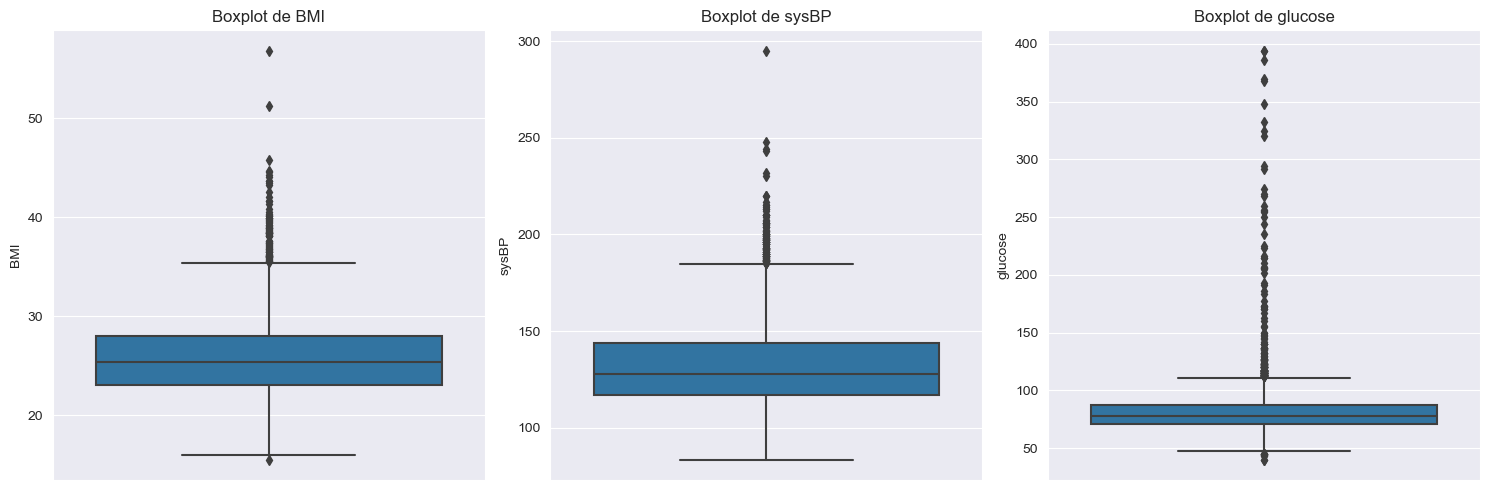

,count,mean,std,min,25%,50%,75%,max
BMI,3656.0,25.784185,4.065913,15.54,23.08,25.38,28.04,56.8
sysBP,3656.0,132.368025,22.092444,83.50,117.00,128.00,144.00,295.0
glucose,3656.0,81.856127,23.910128,40.00,71.00,78.00,87.00,394.0


In [196]:
# Seleccionar las variables cuantitativas a analizar
columnas = ['BMI', 'sysBP', 'glucose']

# Describir estadísticas básicas de las variables seleccionadas
estadisticas = df[columnas].describe().T

# Crear boxplots para cada variable, visualizándolos en forma vertical
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, var in enumerate(columnas):
    sns.boxplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
estadisticas

Hemos generado un análisis descriptivo y gráficos para las variables seleccionadas: BMI, Presión Arterial Sistólica (SysBP) y Nivel de Glucosa. Según los resultados:

- El BMI tiene un promedio de 25.78 y una desviación estándar de 4.06.
- La presión arterial sistólica (SysBP) tiene una mayor dispersión, con una desviación estándar de 22.09.
- El nivel de glucosa también muestra variabilidad, con una desviación estándar de 23.91.

La variable que presenta mayor dispersión es SysBP.

Conclusión:

- Basado en la desviación estándar y los boxplots, se puede observar que sysBP tiende a mostrar una mayor dispersión en comparación con BMI y glucose, debido a la amplitud de su boxplot y la presencia de valores atípicos extendidos.
- La glucosa tiene un comportamiento menos disperso visualmente en comparación, con un rango más estrecho y menos outliers.



3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el
dataset "limpio"

In [197]:
# Definiendo una función para eliminar los outliers utilizando el método del Rango Intercuartílico (IQR)
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR  # Límite inferior para detectar outliers
    limite_superior = Q3 + 1.5 * IQR  # Límite superior para detectar outliers
    return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]  # Filtrando filas dentro de los límites

# Lista de columnas para las cuales queremos eliminar los outliers
columnas = ['BMI', 'sysBP', 'glucose']

# Inicializar los datos limpios como el DataFrame original
datos_limpios_sin_outliers = df

# Aplicar la función de eliminación de outliers a cada columna usando un ciclo for
for columna in columnas:
    datos_limpios_sin_outliers = eliminar_outliers(datos_limpios_sin_outliers, columna)

# Verificar el tamaño del conjunto de datos limpio después de eliminar los outliers
datos_limpios_sin_outliers.shape

(3300, 16)

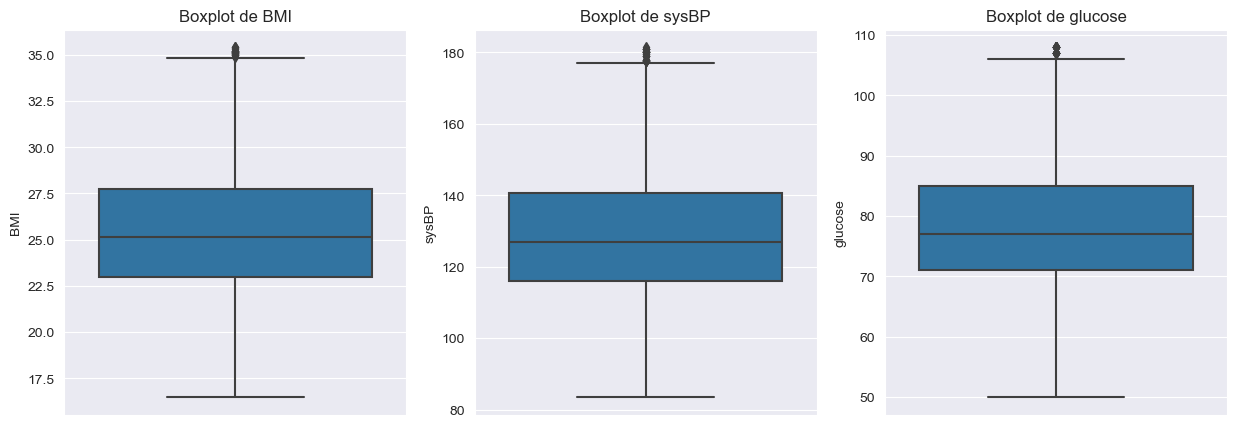

In [198]:
# Validamos visualmente los datos sin outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, var in enumerate(columnas):
    sns.boxplot(data=datos_limpios_sin_outliers, y=var, ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.

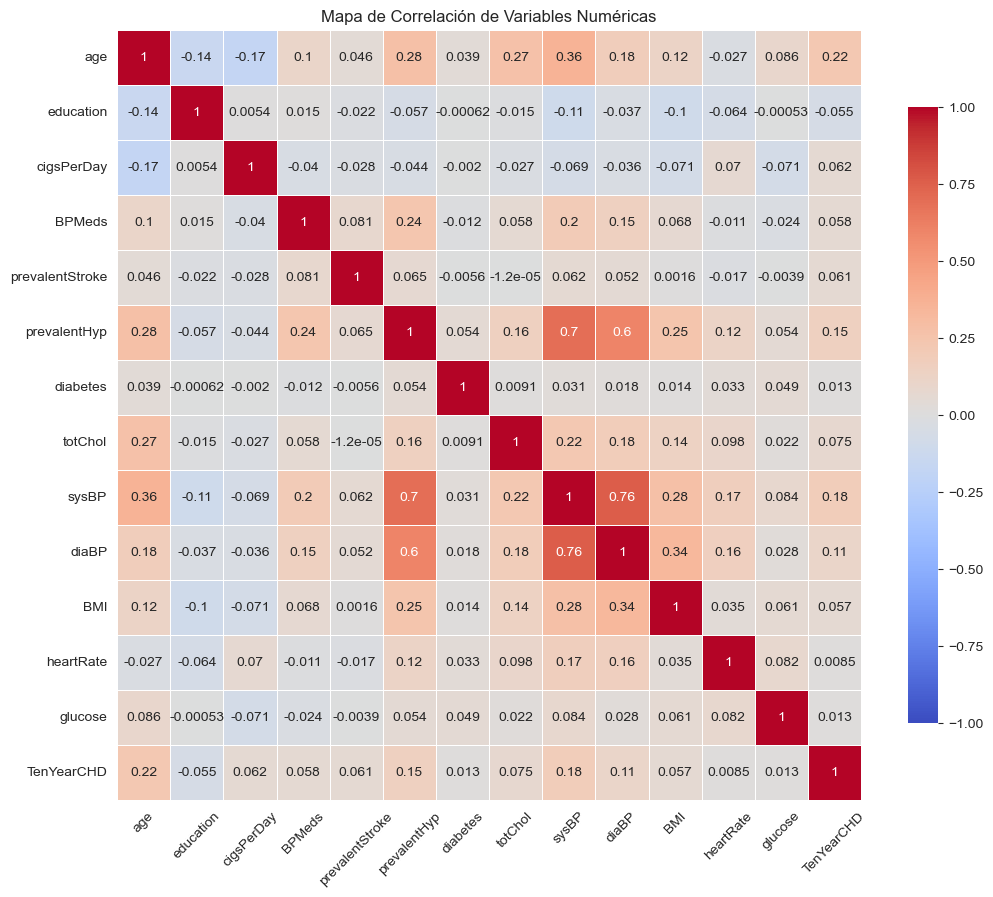

In [199]:
# Función para calcular y visualizar la matriz de correlación con mejoras
def mostrar_matriz_correlacion(df):
    """
    Calcula y muestra la matriz de correlación de un DataFrame, usando un mapa de calor.

    Parámetros:
        df (pd.DataFrame): DataFrame con los datos limpios.

    Retorna:
        None: Muestra el mapa de calor de la matriz de correlación.
    """
    # Seleccionar solo las columnas numéricas
    variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Calcular la matriz de correlación
    matriz_correlacion = df[variables_numericas].corr()

    # Crear el mapa de calor para visualizar la correlación
    plt.figure(figsize=(12, 10))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=0.5, 
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    plt.title("Mapa de Correlación de Variables Numéricas")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Usar la función con el DataFrame limpio
mostrar_matriz_correlacion(datos_limpios_sin_outliers)


Las variables cuantitativas con mayor correlación son Presión Arterial Sistólica (sysBP) y Presión Arterial Diastólica (diaBP), con un coeficiente de correlación de 0.764. Esto indica una fuerte relación entre ambas medidas de presión arterial, lo que es lógico dado que ambas son indicadores relacionados de la salud cardiovascular.



5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea
hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
índice de masa corporal?

In [200]:
# Calcular el cuartil 75 (Q3) de la columna 'BMI'
cuartil = datos_limpios_sin_outliers['BMI'].quantile(0.75)

# Contar el número cuyo BMI es mayor o igual al cuartil 75
sobre = len((datos_limpios_sin_outliers['BMI'] >= cuartil))

# Contar el número total de pacientes (hombres y mujeres) cuyo BMI es mayor o igual al cuartil 75
ambas = len(datos_limpios_sin_outliers[
    (datos_limpios_sin_outliers['BMI'] >= cuartil) &  
    (datos_limpios_sin_outliers['sex'] == 'M')        
])

# Calcular la probabilidad de que un paciente seleccionado al azar con BMI en el cuartil 75 sea un hombre
probabilidad = (ambas / sobre)*100

# Imprimir el resultado de la probabilidad, formateado a dos decimales
print(f"La probabilidad de que al escoger al azar a un paciente este sea hombre, sabiendo que pertenece al mayor cuartil es de {probabilidad:.2f}%")

La probabilidad de que al escoger al azar a un paciente este sea hombre, sabiendo que pertenece al mayor cuartil es de 13.48%


6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

In [201]:
# Definir el nivel de significancia
alpha = 0.05

# Extraer la columna 'heartRate' del DataFrame
ritmoCardiaco = datos_limpios_sin_outliers['heartRate']

# Realizar la prueba de t de Student de una muestra
# Esta prueba evalúa si la media de heartRate es significativamente diferente de 75
t_statistic, p_value = stats.ttest_1samp(ritmoCardiaco, 75)

# Comparar el valor p con el nivel de significancia
if p_value < alpha:
    print("Rechazar H0: Hay evidencia significativa de que el promedio de Ritmo Cardiaco es diferente de 75.")
else:
    print("No se puede rechazar H0: No hay evidencia significativa de que el promedio de Ritmo Cardiaco sea diferente de 75.")

No se puede rechazar H0: No hay evidencia significativa de que el promedio de Ritmo Cardiaco sea diferente de 75.


7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
pacientes fumadores? Explica.

In [202]:
# Definir el nivel de significancia
alpha = 0.05

# Filtrar los datos para hombres y mujeres
hombres = datos_limpios_sin_outliers[datos_limpios_sin_outliers['sex'] == 'M']['cigsPerDay']
mujeres = datos_limpios_sin_outliers[datos_limpios_sin_outliers['sex'] == 'F']['cigsPerDay']

# Realizar la prueba t de dos muestras independientes
# Esto evalúa si hay una diferencia significativa en el consumo de cigarrillos entre hombres y mujeres
t_statistic, p_value = stats.ttest_ind(hombres, mujeres, equal_var=False)

# Verificar los resultados de la prueba
if p_value < alpha:
    print("Rechazar H0: Hay una diferencia significativa en el consumo de cigarrillos entre hombres y mujeres.")
else:
    print("No se puede rechazar H0: No hay diferencia significativa en el consumo de cigarrillos entre hombres y mujeres.")


Rechazar H0: Hay una diferencia significativa en el consumo de cigarrillos entre hombres y mujeres.


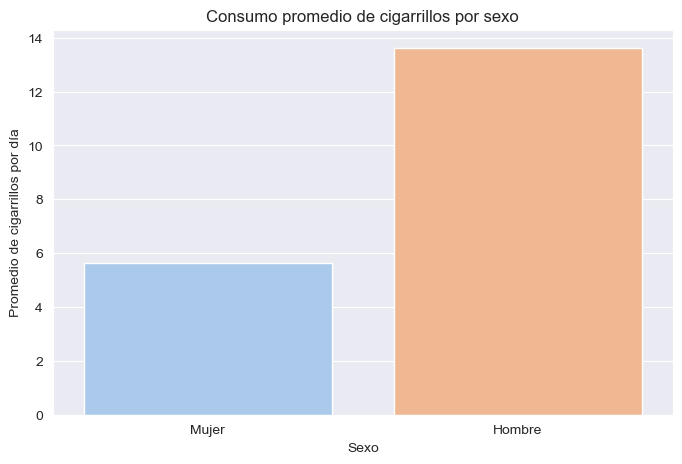

In [203]:
# Calcular el promedio de cigarrillos por día por sexo
promedio_cigs = datos_limpios_sin_outliers.groupby('sex')['cigsPerDay'].mean().reset_index()

# Cambiar las etiquetas de sexo
promedio_cigs['sex'] = promedio_cigs['sex'].map({'M': 'Hombre', 'F': 'Mujer'})

# Crear una figura
plt.figure(figsize=(8, 5))

# Crear el gráfico de barras
sns.barplot(x='sex', y='cigsPerDay', data=promedio_cigs, palette='pastel')

# Añadir título y etiquetas
plt.title('Consumo promedio de cigarrillos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Promedio de cigarrillos por día')

# Mostrar la gráfica
plt.show()

Conclusión:

El gráfico de barras muestra que las mujeres consumen un promedio de aproximadamente 6 cigarrillos por día, mientras que los hombres casi alcanzan los 14. 

8. Construye un modelo de regresión lineal que permita relacionar 6 variables del
dataset con el índice de masa corporal. (Debes incluir al menos dos variables
cualitativas). Evalúa tu modelo y explica.

In [204]:
# Modelo de regresión lineal para predecir BMI utilizando 6 variables (incluyendo dos categóricas)
X_linear = pd.get_dummies(datos_limpios_sin_outliers[['age', 'sysBP', 'currentSmoker', 'glucose', 'education', 'sex']], drop_first=True)
y_linear = datos_limpios_sin_outliers['BMI']

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_linear, y_linear)

# Realizar predicciones en el conjunto de datos
y_pred = modelo.predict(X_linear)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_linear, y_pred)
mae = mean_absolute_error(y_linear, y_pred)
r2 = r2_score(y_linear, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2: {r2}")

Mean Squared Error (MSE): 10.577101532438535
Mean Absolute Error (MAE): 2.5607620186526465
R^2: 0.12643682940802448


Conclusión de los Resultados:
1. Error Cuadrático Medio (MSE): El MSE de aproximadamente 10.58 indica que, en promedio, las predicciones del modelo de regresión lineal tienen un error cuadrático de este valor en relación a los valores reales de BMI. Un MSE relativamente alto sugiere que el modelo tiene dificultades para ajustarse a los datos, lo que podría ser una señal de que hay factores relevantes no considerados en el modelo o que la relación entre las variables no es lineal.

2. Error Absoluto Medio (MAE): Con un MAE de aproximadamente 2.56, esto indica que, en promedio, las predicciones del modelo difieren de los valores reales de BMI por cerca de 2.59 unidades. Aunque este error es más fácil de interpretar que el MSE, un MAE que no es bajo puede reflejar problemas en la precisión del modelo.

3. R^2 (Coeficiente de Determinación): El valor de R² de aproximadamente 0.10 indica que solo el 12.64% de la variabilidad en BMI se explica por las variables independientes en el modelo. Esto sugiere que el modelo tiene un bajo poder predictivo y que podría no ser adecuado para capturar la complejidad del fenómeno que se está analizando.

9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una
enfermedad coronaria en los próximos diez años, a partir de las variables descritas.
Verifica el balanceo de datos y evalúa tu modelo.


In [205]:
# Verificamos si hay desbalanceo en los datos para la variable TenYearCHD
print(datos_limpios_sin_outliers['TenYearCHD'].value_counts())

TenYearCHD
0    2850
1     450
Name: count, dtype: int64


Se puede apreciar un evidente desbalanceo, asi que aplicaremos SMOTE para generar muestras sinteticas

In [206]:
# Asegúrate de convertir las variables categóricas en variables dummy (One-Hot Encoding)
datos_limpios_sin_outliers = pd.get_dummies(datos_limpios_sin_outliers, drop_first=True)

# Modelo de regresión logística para predecir TenYearCHD
X = datos_limpios_sin_outliers.drop(columns=["TenYearCHD"]).values
y = datos_limpios_sin_outliers["TenYearCHD"].values

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modelo de Regresión Logística con SMOTE
logistic_regression_model_smote = LogisticRegression(random_state=42)
logistic_regression_model_smote.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de datos con SMOTE
y_pred_smote = logistic_regression_model_smote.predict(X)

roc_auc = roc_auc_score(y, y_pred_smote)
average_precision = average_precision_score(y, y_pred_smote)

# Imprimir AUC-ROC y AUC-PR
print("AUC-ROC:", roc_auc)
print("AUC-PR:", average_precision)


AUC-ROC: 0.6701169590643274
AUC-PR: 0.2070982117943444


Los resultados de la evaluación del modelo de regresión logística indican que tiene un AUC-ROC de aproximadamente 0.67, lo que sugiere un rendimiento moderado en la discriminación entre las clases. Sin embargo, el AUC-PR de 0.21 es relativamente bajo, lo que indica que el modelo tiene dificultades para identificar correctamente las instancias positivas. Esto podría deberse a un desequilibrio en los datos o a la necesidad de mejorar las características del modelo. Es recomendable explorar más técnicas de optimización y ajuste de hiperparámetros para mejorar la capacidad predictiva del modelo.

10. Separa los modelos de regresión anteriores en dos distintos, respectivamente,
considerando alguna variable categórica. Compara y concluye.

In [207]:
# En este paso, vamos a separar los modelos de regresión lineal que hemos desarrollado anteriormente, basándonos en la categoría de si la persona es fumadora o no. Compararemos las métricas de rendimiento de ambos modelos para analizar cómo la variable 'currentSmoker' afecta las predicciones del índice de masa corporal (BMI).


# Separar el dataset en fumadores y no fumadores
datos_limpios_sin_outliers_smoker_si = datos_limpios_sin_outliers[datos_limpios_sin_outliers['currentSmoker_Yes'] == 1]
datos_limpios_sin_outliers_smoker_no = datos_limpios_sin_outliers[datos_limpios_sin_outliers['currentSmoker_Yes'] == 0]

# Definir las variables predictoras (X) y la variable dependiente (y) para fumadores ('Yes')
X_smoker_si = datos_limpios_sin_outliers_smoker_si[['age', 'sex_M', 'cigsPerDay', 'diabetes', 'totChol']]
y_smoker_si = datos_limpios_sin_outliers_smoker_si['BMI']

# Definir las variables predictoras (X) y la variable dependiente (y) para no fumadores ('No')
X_smoker_no = datos_limpios_sin_outliers_smoker_no[['age', 'sex_M', 'diabetes', 'totChol']]
y_smoker_no = datos_limpios_sin_outliers_smoker_no['BMI']

# Ajustar el modelo de regresión lineal para fumadores
modelo_smoker_si = LinearRegression()
modelo_smoker_si.fit(X_smoker_si, y_smoker_si)

# Ajustar el modelo de regresión lineal para no fumadores
modelo_smoker_no = LinearRegression()
modelo_smoker_no.fit(X_smoker_no, y_smoker_no)

# Realizar predicciones para fumadores
y_pred_smoker_si = modelo_smoker_si.predict(X_smoker_si)

# Realizar predicciones para no fumadores
y_pred_smoker_no = modelo_smoker_no.predict(X_smoker_no)

# Calcular las métricas de evaluación para fumadores
mse_smoker_si = mean_squared_error(y_smoker_si, y_pred_smoker_si)
mae_smoker_si = mean_absolute_error(y_smoker_si, y_pred_smoker_si)
r2_smoker_si = r2_score(y_smoker_si, y_pred_smoker_si)

# Calcular las métricas de evaluación para no fumadores
mse_smoker_no = mean_squared_error(y_smoker_no, y_pred_smoker_no)
mae_smoker_no = mean_absolute_error(y_smoker_no, y_pred_smoker_no)
r2_smoker_no = r2_score(y_smoker_no, y_pred_smoker_no)

# Imprimir los resultados para fumadores
print("Métricas para fumadores ('Yes'):")
print(f"Mean Squared Error (MSE): {mse_smoker_si}")
print(f"Mean Absolute Error (MAE): {mae_smoker_si}")
print(f"R^2: {r2_smoker_si}")

# Imprimir los resultados para no fumadores
print("Métricas para no fumadores ('No'):")
print(f"Mean Squared Error (MSE): {mse_smoker_no}")
print(f"Mean Absolute Error (MAE): {mae_smoker_no}")
print(f"R^2: {r2_smoker_no}")


Métricas para fumadores ('Yes'):
Mean Squared Error (MSE): 10.906440905748202
Mean Absolute Error (MAE): 2.5841026870093406
R^2: 0.07224778049181213
Métricas para no fumadores ('No'):
Mean Squared Error (MSE): 11.371215813486396
Mean Absolute Error (MAE): 2.699301692166724
R^2: 0.04494037432982556


Los resultados muestran que, para los fumadores, el modelo tiene un Mean Squared Error (MSE) de aproximadamente 10.91 y un Mean Absolute Error (MAE) de alrededor de 2.58, lo que indica que, en promedio, las predicciones se desvían de los valores reales en 2.58 unidades. Sin embargo, el 
R
2
  de 0.072 sugiere que el modelo explica solo el 7.2% de la variabilidad de los datos, indicando un ajuste deficiente. Para los no fumadores, el MSE es ligeramente mayor, en torno a 11.37, y el MAE es de 2.70, lo que también refleja un rendimiento similar en términos de precisión. En general, ambos grupos presentan un bajo poder predictivo, lo que sugiere la necesidad de mejorar el modelo o considerar características adicionales para obtener mejores resultados.

In [208]:
# Analizaré ahora el modelo de regresión logística, separando entre hombres y mujeres.

# Supongamos que ya tienes X_resampled, y_resampled, y el DataFrame df

# Divide el DataFrame en dos subconjuntos: uno para hombres (sex=1) y otro para mujeres (sex=0)
datos_limpios_sin_outliers_hombres = datos_limpios_sin_outliers[datos_limpios_sin_outliers['sex_M'] == 1]
datos_limpios_sin_outliers_mujeres = datos_limpios_sin_outliers[datos_limpios_sin_outliers['sex_M'] == 0]

# Variables predictoras y variable dependiente para hombres
X_hombres = datos_limpios_sin_outliers_hombres.drop(columns=["TenYearCHD"]).values
y_hombres = datos_limpios_sin_outliers_hombres["TenYearCHD"].values

# Variables predictoras y variable dependiente para mujeres
X_mujeres = datos_limpios_sin_outliers_mujeres.drop(columns=["TenYearCHD"]).values
y_mujeres = datos_limpios_sin_outliers_mujeres["TenYearCHD"].values

# Estandarizar las características para ambos subconjuntos
scaler = StandardScaler()
X_hombres = scaler.fit_transform(X_hombres)
X_mujeres = scaler.transform(X_mujeres)

# Aplicar SMOTE por separado para hombres y mujeres
smote_hombres = SMOTE(random_state=42)
X_resampled_hombres, y_resampled_hombres = smote_hombres.fit_resample(X_hombres, y_hombres)

smote_mujeres = SMOTE(random_state=42)
X_resampled_mujeres, y_resampled_mujeres = smote_mujeres.fit_resample(X_mujeres, y_mujeres)

# Modelo de Regresión Logística con SMOTE para hombres
logistic_regression_model_hombres = LogisticRegression(random_state=42)
logistic_regression_model_hombres.fit(X_resampled_hombres, y_resampled_hombres)

# Modelo de Regresión Logística con SMOTE para mujeres
logistic_regression_model_mujeres = LogisticRegression(random_state=42)
logistic_regression_model_mujeres.fit(X_resampled_mujeres, y_resampled_mujeres)

# Realizar predicciones en los conjuntos de datos con SMOTE
y_pred_hombres = logistic_regression_model_hombres.predict(X_hombres)
y_pred_mujeres = logistic_regression_model_mujeres.predict(X_mujeres)

# Calcular las métricas de evaluación para hombres por separado
roc_auc_hombres = roc_auc_score(y_hombres, y_pred_hombres)
average_precision_hombres = average_precision_score(y_hombres, y_pred_hombres)

# Calcular las métricas de evaluación para mujeres por separado
roc_auc_mujeres = roc_auc_score(y_mujeres, y_pred_mujeres)
average_precision_mujeres = average_precision_score(y_mujeres, y_pred_mujeres)

# Imprimir AUC-ROC y AUC-PR por separado para hombres y mujeres
print("Métricas para hombres:")
print("AUC-ROC:", roc_auc_hombres)
print("AUC-PR:", average_precision_hombres)

print("Métricas para mujeres:")
print("AUC-ROC:", roc_auc_mujeres)
print("AUC-PR:", average_precision_mujeres)


Métricas para hombres:
AUC-ROC: 0.6663945578231293
AUC-PR: 0.26180933938034845
Métricas para mujeres:
AUC-ROC: 0.6572105926860027
AUC-PR: 0.15247850026484572


Los resultados indican que el modelo presenta un AUC-ROC de aproximadamente 0.67 para hombres y 0.66 para mujeres, lo que sugiere un rendimiento moderado en la capacidad del modelo para discriminar entre las clases en ambos grupos. Sin embargo, el AUC-PR para hombres es de 0.26, mientras que para mujeres es significativamente más bajo, con un valor de 0.15. Esto sugiere que el modelo tiene dificultades para identificar correctamente las instancias positivas, especialmente entre las mujeres. En general, aunque el modelo muestra un rendimiento similar en términos de discriminación entre géneros, se requiere una mejora significativa en la precisión de las predicciones, particularmente para las mujeres.